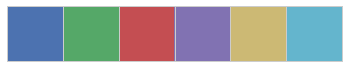

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
sns.set()
sns.set_style("whitegrid")
reso=300
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [2]:
def weighted_std(values, weights):
    """
    Return the weighted average and standard deviation.
    Richard M. Brugger, "A Note on Unbiased Estimation of the Standard Deviation", The American Statistician (23) 4 p. 32 (1969)

    values, weights -- Numpy ndarrays with the same shape.
    """
    n=len(values)
    average = np.average(values, weights=weights)
    variance = (n/(n-1.5))*np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return np.sqrt(variance),average

In [104]:
dedd=pd.read_csv('EDDtable14Mar2018170435.txt',low_memory=False,header=0,skiprows=[0,2,3,4])

In [105]:
df=dedd.copy()
dedd.head()

,pgc,Dist,Nd,DM,eDM,C,T,L,M,S,...,Vcgp,Vmgp,Vrms,bwMass12,L_Mass12,LDC,HDC,2M++,MKgp,Icnt
0,4,50.58,1,33.52,0.4,NaN,NaN,NaN,NaN,NaN,...,4005,4048,25.0,0.0,9.747,0,0,0,0,0
1,27,150.66,1,35.89,0.5,NaN,NaN,NaN,NaN,NaN,...,10959,11275,NaN,0.0,0.000,0,0,0,0,0
2,40,116.95,1,35.34,0.5,NaN,NaN,NaN,NaN,NaN,...,6919,7045,0.0,0.0,3.960,0,0,0,0,0
3,51,240.99,1,36.91,0.5,NaN,NaN,NaN,NaN,NaN,...,14743,15315,132.0,0.0,253.333,0,0,0,0,0
4,55,73.79,1,34.34,0.4,NaN,NaN,NaN,NaN,NaN,...,4454,4507,NaN,0.0,0.000,0,0,0,0,0


In [62]:
dedd.columns

Index(['pgc', 'Dist', 'Nd', 'DM', 'eDM', 'C', 'T', 'L', 'M', 'S', 'N', 'H',
       'I', 'F', 'DM2', 'eD2', 'SNIa', 'Ns', 'DMsn', 'DMsp', 'eDsp', 'DM6d',
       'eD6d', 'Mt', 'RAJ', 'DeJ', 'Glon', 'Glat', 'SGL', 'SGB', 'Ty', 'Asf',
       'Btot', 'Ks', 'Vhel', 'Vgsr', 'Vls', 'Vcmb', 'Vmod', 'Name', 'Nest',
       'Ndgp', 'DMgp', 'eDgp', 'Dgp', 'Abell', 'GroupName', 'NV', 'PGC1',
       'Glongp', 'Glatgp', 'SGLgp', 'SGBgp', 'lgLgp', 'cf', 'sigp', 'R2t',
       'Vhgp', 'Vggp', 'Vlsgp', 'Vcgp', 'Vmgp', 'Vrms', 'bwMass12', 'L_Mass12',
       'LDC', 'HDC', '2M++', 'MKgp', 'Icnt'],
      dtype='object')

In [63]:
len(dedd)

17648

In [64]:
dedd.columns[np.array([i[0]=='D' for i in dedd.columns])]

Index(['Dist', 'DM', 'DM2', 'DMsn', 'DMsp', 'DM6d', 'DeJ', 'DMgp', 'Dgp'], dtype='object')

In [65]:
dedd.columns[np.array([i[0]=='e' for i in dedd.columns])]

Index(['eDM', 'eD2', 'eDsp', 'eD6d', 'eDgp'], dtype='object')

In [106]:
colu=list(dedd.columns)
for i in ['pgc','Name','Dist', 'DM', 'DM2', 'DMsn', 'DMsp', 'DM6d','eDM', 'eD2', 'eDsp', 'eD6d']:
    colu.remove(i)
dedd.drop(colu, inplace=True, axis=1)

In [74]:
dedd.head()

,pgc,Dist,DM,eDM,DM2,eD2,DMsn,DMsp,eDsp,DM6d,eD6d,Name
0,4,50.58,33.52,0.4,33.52,0.4,0.0,0.0,0.0,0.00,0.0,AGC331060
1,27,150.66,35.89,0.5,0.00,0.0,0.0,0.0,0.0,35.89,0.5,NaN
2,40,116.95,35.34,0.5,0.00,0.0,0.0,0.0,0.0,35.34,0.5,NaN
3,51,240.99,36.91,0.5,0.00,0.0,0.0,0.0,0.0,36.91,0.5,PGC000051
4,55,73.79,34.34,0.4,34.34,0.4,0.0,0.0,0.0,0.00,0.0,UGC12898


In [11]:
meas=[]
for i in range(len(dedd)):
    em=0
    if dedd.DM2.iloc[i]>0:
        em+=1
    if dedd.DMsn.iloc[i]>0:
        em+=1
    if dedd.DMsp.iloc[i]>0:
        em+=1
    if dedd.DM6d.iloc[i]>0:
        em+=1
    meas+=[em]

In [12]:
len(meas)

17648

In [81]:
(np.array(meas)>1).sum()

1784

In [82]:
(np.array(meas)==0).sum()

4

(array([  4.00000000e+00,   0.00000000e+00,   1.58600000e+04,
          0.00000000e+00,   0.00000000e+00,   1.72600000e+03,
          0.00000000e+00,   5.70000000e+01,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

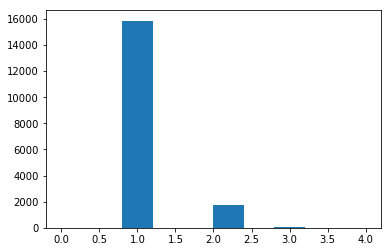

In [16]:
plt.hist(meas)

In [94]:
%%time
nbins=10000
bootp50=[] # mean error from the bootstrap for each galaxy
bootsig=[] # uncertainty of the error -> may not be a good predictor
dboot=[] # mean bootstrap distance
bootmad=[] # median absolute deviation (robust)
ecf=[]
eqd=[]
mpgc=[]
for i,em in zip(range(len(dedd)),meas):
    tli=[]
    err=[]
    mod=[]
    if em>1:
        if dedd.DM2.iloc[i]>0:
            km=dedd.DM2.iloc[i]
            ke=dedd.eD2.iloc[i]
            mod+=[km]
            err+=[ke]
            tli+=[(10**(np.random.normal(km,ke,nbins)/5.+1))]
        if dedd.DMsn.iloc[i]>0:
            km=dedd.DMsn.iloc[i]
            ke=0.175 # from CF3 database approx.
            mod+=[km]
            err+=[ke]
            tli+=[(10**(np.random.normal(km,ke,nbins)/5.+1))]
        if dedd.DMsp.iloc[i]>0:
            km=dedd.DMsp.iloc[i]
            ke=dedd.eDsp.iloc[i]
            mod+=[km]
            err+=[ke]
            tli+=[(10**(np.random.normal(km,ke,nbins)/5.+1))]
        if dedd.DM6d.iloc[i]>0:
            km=dedd.DM6d.iloc[i]
            ke=dedd.eD6d.iloc[i]
            mod+=[km]
            err+=[ke]
            tli+=[(10**(np.random.normal(km,ke,nbins)/5.+1))]
        tli=np.array(tli)
        mod=np.array(mod)
        err=np.array(err)
        booterr=(np.percentile(tli, 84,axis=0)-np.percentile(tli, 16,axis=0))/2 # sigma draws from bootstrap for each gal
        bootmean=np.median(tli,axis=0) # mean draws from bootstrap for each gal
        bootp50+=[np.median(booterr)/1e6] # mean bootstrap error
        bootsig+=[((np.percentile(booterr, 84)-np.percentile(booterr, 16)))/2e6] # the error of the error
        bootmad+=[np.median(np.abs(tli - np.median(tli)))/1e6]
        dboot+=[np.median(bootmean)/1e6] # bootstrap mean D
        wnat,avnat = weighted_std(mod,1/err**2)
        distwav=10**(avnat/5+1)/1e6
        wsti=0.461*distwav*wnat # weighted standard deviation
        ecfi=0.461*distwav/np.sqrt((1/err**2).sum()) # error according to cosmicflows
        ecf+=[ecfi]
        eqd+=[np.sqrt(ecfi**2+wsti**2)]  
        mpgc+=[dedd.pgc.iloc[i]]
    if em<=1:
        bootp50+=[0] # mean error from the bootstrap for each galaxy
        bootsig+=[0] # uncertainty of the error -> may not be a good predictor
        bootmad+=[0] # median absolute deviation (robust)
        wnat,avnat = dedd.eDM.iloc[i],dedd.DM.iloc[i]
        distwav=10**(avnat/5+1)/1e6
        dboot+=[distwav] # regular distance
        ecfi=0.461*distwav/np.sqrt((1/dedd.eDM.iloc[i]**2).sum()) # error according to cosmicflows
        ecf+=[ecfi]
        eqd+=[0]
        mpgc+=[dedd.pgc.iloc[i]]

CPU times: user 11 s, sys: 28.6 ms, total: 11 s
Wall time: 11 s


In [115]:
d = {'pgc':mpgc,'meas': meas, 'H (Mpc)':bootp50, 'D (Mpc)':dboot,'P (Mpc)':ecf,'Q (Mpc)':eqd,'M (Mpc)':bootmad}
dfb = pd.DataFrame(data=d)

In [117]:
dfb['Name']=df['Name']

In [118]:
dfb.to_csv("cf3_bootstrap_results.csv")

In [141]:
filt=(np.array(meas)==2)
x=np.array(dboot)[filt]
y=np.array(bootp50)[filt]
cf=np.array(ecf)[filt]
qd=np.array(eqd)[filt]
z=np.array(bootmad)[filt]
ee=np.array(bootsig)[filt]

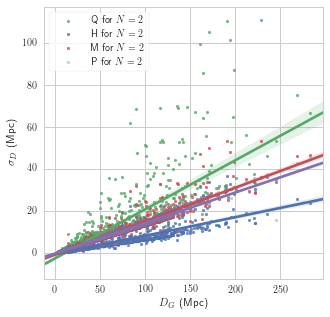

In [142]:
plt.figure(figsize=(5,5))
sns.regplot(x,qd,color=current_palette[1], scatter_kws={'alpha':0.8,'s':10},label='Q for $N=2$') # green, quadrature
sns.regplot(x,y,color=current_palette[0],label=r'H for $N=2$', scatter_kws={'s':10})
sns.regplot(x,z,color=current_palette[2],label='M for $N=2$', scatter_kws={'alpha':0.8,'s':10})
sns.regplot(x,cf,color=current_palette[3], scatter_kws={'alpha':0.4,'s':10},label='P for $N=2$') # red, cosmicflows
plt.legend(loc='upper left',frameon=True)#bbox_to_anchor=(1.3, 0.5))
plt.xlabel(r"$D_G$ (Mpc)")
plt.ylabel(r'$\sigma_D$ (Mpc)')
#plt.ylim(0,15)
plt.savefig('mnras/CF3low.pdf', dpi=reso,transparent=True)
plt.savefig('mnras/CF3low.png', dpi=reso,transparent=True)

In [143]:
filt=(np.array(meas)>2)
x=np.array(dboot)[filt]
y=np.array(bootp50)[filt]
cf=np.array(ecf)[filt]
qd=np.array(eqd)[filt]
z=np.array(bootmad)[filt]
ee=np.array(bootsig)[filt]

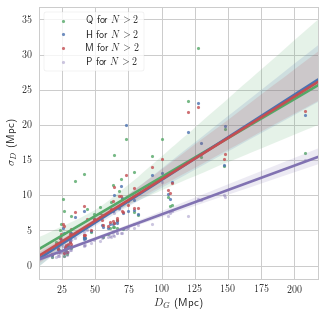

In [144]:
plt.figure(figsize=(5,5))
sns.regplot(x,qd,color=current_palette[1], scatter_kws={'alpha':0.8,'s':10},label='Q for $N>2$') # green, quadrature
sns.regplot(x,y,color=current_palette[0],label=r'H for $N>2$', scatter_kws={'s':10})
sns.regplot(x,z,color=current_palette[2],label='M for $N>2$', scatter_kws={'alpha':0.8,'s':10})
sns.regplot(x,cf,color=current_palette[3], scatter_kws={'alpha':0.4,'s':10},label='P for $N>2$') # red, cosmicflows
plt.legend(loc='upper left',frameon=True)#bbox_to_anchor=(1.3, 0.5))
plt.xlabel(r"$D_G$ (Mpc)")
plt.ylabel(r'$\sigma_D$ (Mpc)')
#plt.ylim(0,15)
plt.savefig('mnras/CF3high.pdf', dpi=reso,transparent=True)
plt.savefig('mnras/CF3high.png', dpi=reso,transparent=True)

In [114]:
df[['pgc','DM','eDM','DMgp','eDgp','Name']][np.array(meas)==0] # all these except for NGC4625 get their distance from group

,pgc,DM,eDM,DMgp,eDgp,Name
924,5974,29.95,0.2,29.95,0.20,NGC0628
1878,12209,29.79,0.2,29.79,0.20,NGC1291
5618,42607,30.23,0.3,28.44,0.04,NGC4625
6419,47404,29.67,0.2,29.79,0.20,NGC5194


In [96]:
# measurement for NGC4625 comes from elsewhere
clm=list(df.columns)
for i in clm:
    print(df[i][df.pgc==42607].iloc[0])

42607
11.12
1
30.23
0.3
nan
nan
L
nan
nan
nan
nan
nan
nan
0.0
0.0
nan
0
0.0
0.0
0.0
0.0
0.0
nan
124152.7
411626
130.2305
75.7186
75.6936
7.8831
8.7
0.066
13.03
9.74
609
662
665
835
837
NGC4625
100491
20
28.44
0.04
4.9
nan
nan
3
46153
107.66
74.49
76.1665
13.7581
11.03
1.0
131.0
0.357
554
624
629
760
762
73.0
0.0
4.533
852
699
1002
5066893
0


In [120]:
dedd[(df.L=='L')&(df.Nd==2)] # when TRGB measurements are carried over from CF2, they are not included

,pgc,Dist,DM,eDM,DM2,eD2,DMsn,DMsp,eDsp,DM6d,eD6d,Name
137,1038,1.96,26.46,0.16,26.46,0.16,0.0,0.0,0.0,0.0,0.0,ESO410-005
216,1641,2.00,26.50,0.16,26.50,0.16,0.0,0.0,0.0,0.0,0.0,ESO294-010
288,2121,0.73,24.33,0.16,24.33,0.16,0.0,0.0,0.0,0.0,0.0,And3
331,2429,0.81,24.54,0.16,24.54,0.16,0.0,0.0,0.0,0.0,0.0,NGC205
380,2666,0.75,24.38,0.16,24.38,0.16,0.0,0.0,0.0,0.0,0.0,And1
410,2881,3.48,27.71,0.16,27.71,0.16,0.0,0.0,0.0,0.0,0.0,ESO540-030
413,2902,3.39,27.65,0.16,27.65,0.16,0.0,0.0,0.0,0.0,0.0,DDO6
420,2933,3.60,27.78,0.16,27.78,0.16,0.0,0.0,0.0,0.0,0.0,ESO540-032
527,3589,0.08,19.60,0.16,19.60,0.16,0.0,0.0,0.0,0.0,0.0,ESO351-030
585,3974,4.70,28.36,0.16,28.36,0.16,0.0,0.0,0.0,0.0,0.0,UGC685


In [121]:
dedd[(df.L=='L')&(df.Nd==1)&(np.array(meas)>0)] # also from cosmicflows

,pgc,Dist,DM,eDM,DM2,eD2,DMsn,DMsp,eDsp,DM6d,eD6d,Name
5425,41018,15.70,30.98,0.28,30.98,0.28,0.0,0.0,0.0,0.0,0.0,IC3388
7309,54074,0.07,19.16,0.28,19.16,0.28,0.0,0.0,0.0,0.0,0.0,UGC09749
8018,60095,0.08,19.49,0.28,19.49,0.28,0.0,0.0,0.0,0.0,0.0,UGC10822
